In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

%matplotlib inline

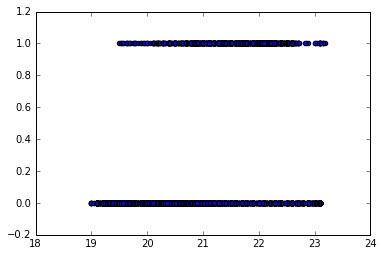

In [30]:
df = pd.read_csv("datatraining.txt")

#features
df_temperature = df['Temperature']
df_humidity = df['Humidity']
df_light = df['Light']
df_co2 = df['CO2']
df_humidityratio = df['HumidityRatio']

#target
df_occupancy = df['Occupancy'] #either 0 or 1

plt.scatter(df_temperature, df_occupancy)


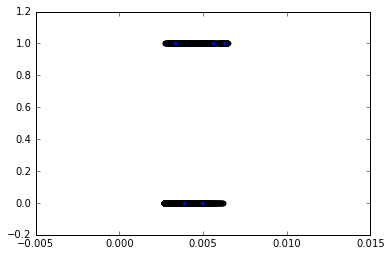

In [9]:
plt.scatter(df_humidity, df_occupancy)

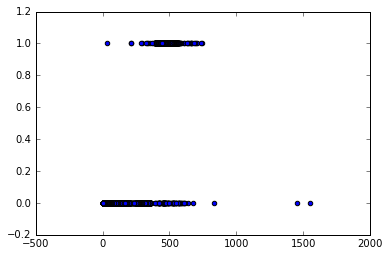

In [11]:
plt.scatter(df_light, df_occupancy)

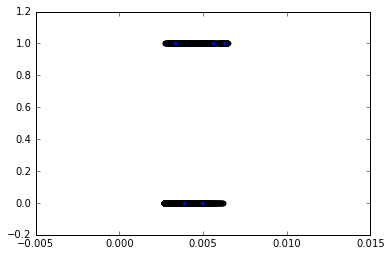

In [31]:
plt.scatter(df_humidityratio, df_occupancy)

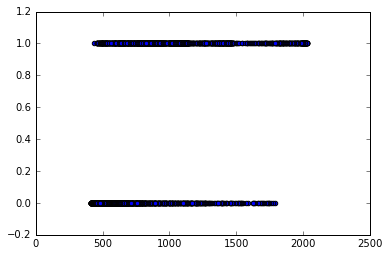

In [13]:
plt.scatter(df_co2, df_occupancy)

In [14]:
#TRAIN
df = pd.read_csv("datatraining.txt") #a separate file for training
df.dropna(how = 'all', inplace = True)

x_train = np.array(df.drop(["date","Occupancy"],1))
y_train = np.array(df["Occupancy"])

svc = svm.SVC()
svc.fit(x_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
#TEST

df_test = pd.read_csv("datatest.txt") #a separate file for testing
df_test.dropna(how = 'all', inplace = True)

x_test = np.array(df_test.drop(["date","Occupancy"],1))
y_test = np.array(df_test["Occupancy"])

print("RBF Kernel: ", svc.score(x_test, y_test))

RBF Kernel:  0.910318949343


In [18]:
#TEST-2

df_test2 = pd.read_csv("datatest2.txt") #another separate file for testing
df_test2.dropna(how = 'all', inplace = True)

x_test2 = np.array(df_test2.drop(["date","Occupancy"],1))
y_test2 = np.array(df_test2["Occupancy"])

print("RBF Kernel: ", svc.score(x_test2, y_test2))

RBF Kernel:  0.579368334701


In [22]:
#result is poor

clf2 = svm.SVC(kernel='linear')
clf2.fit(x_train,y_train)
print("linear Kernel: ", clf2.score(x_test2, y_test2))

linear Kernel:  0.992616899098


In [23]:
#result is so much better with linear kernel

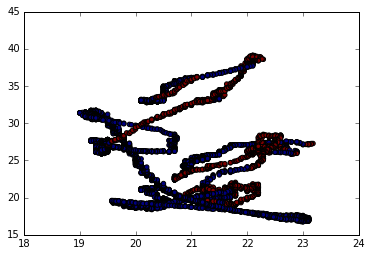

In [33]:
#USE FEWER FEATURES

plt.scatter(df_temperature,df_humidity,c=y_train)

In [40]:
x_train3 = np.array(df.drop(["date","Occupancy","CO2","Light","HumidityRatio"],1))

clf3 = svm.SVC(kernel="poly")
clf3.fit(x_train3,y_train)

#print(clf3.score(x_test,y_test)) #need to match the number of features

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

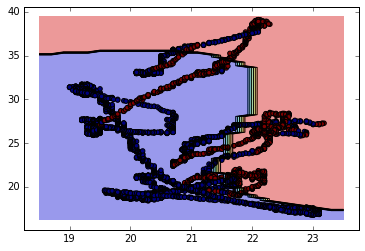

In [45]:
#plot decision boundary

x_min, x_max = df_temperature.min() -.5, df_temperature.max() + .5
y_min, y_max = df_humidity.min() - .5, df_humidity.max() + .5

h = 0.2
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

Z = clf3.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z, alpha=0.4)
plt.contour(X,Y,Z, colors='k')
plt.scatter(df_temperature,df_humidity,c=y_train)


In [46]:
#poor decision boundary

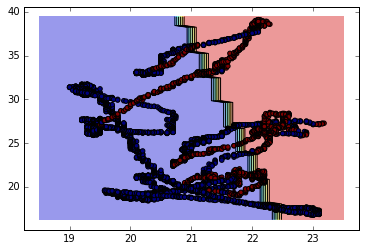

In [52]:
clf3 = svm.SVC(kernel="linear")
clf3.fit(x_train3,y_train)

x_min, x_max = df_temperature.min() -.5, df_temperature.max() + .5
y_min, y_max = df_humidity.min() - .5, df_humidity.max() + .5

h = 0.2
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

Z = clf3.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z, alpha=0.4)
plt.contour(X,Y,Z, colors='k')
plt.scatter(df_temperature,df_humidity,c=y_train)

In [ ]:
x_train4 = np.array(df.drop(["date","Occupancy","CO2","Humidity","HumidityRatio"],1))

clf4 = svm.SVC(kernel="poly")
clf4.fit(x_train4,y_train)

x_min, x_max = df_temperature.min() -.5, df_temperature.max() + .5
y_min, y_max = df_light.min() - .5, df_light.max() + .5

h = 0.2
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

Z = clf4.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z, alpha=0.4)
plt.contour(X,Y,Z)
plt.scatter(df_temperature, df_light, c=y_train)